'''
I/We Venkata Sai Kuniganti declare that I/We have completed this computer code in accordance with the UAB Academic Integrity Code and the UAB CS Honor Code.  I/We have read the UAB Academic Integrity Code and understand that any breach of the Code may result in severe penalties.	
Student signature(s)/initials: Venakaa Sai Kuniganti	
Date: 02/14/2024
'''

In [1]:
import numpy as n
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

In [2]:
Dataset_CIFAR10 = cifar10.load_data()
training_dataset = Dataset_CIFAR10[0]
test_dataset = Dataset_CIFAR10[1]
input_Training = training_dataset[0]
output_training = training_dataset[1]

input_Testing = test_dataset[0]
output_testing = test_dataset[1]

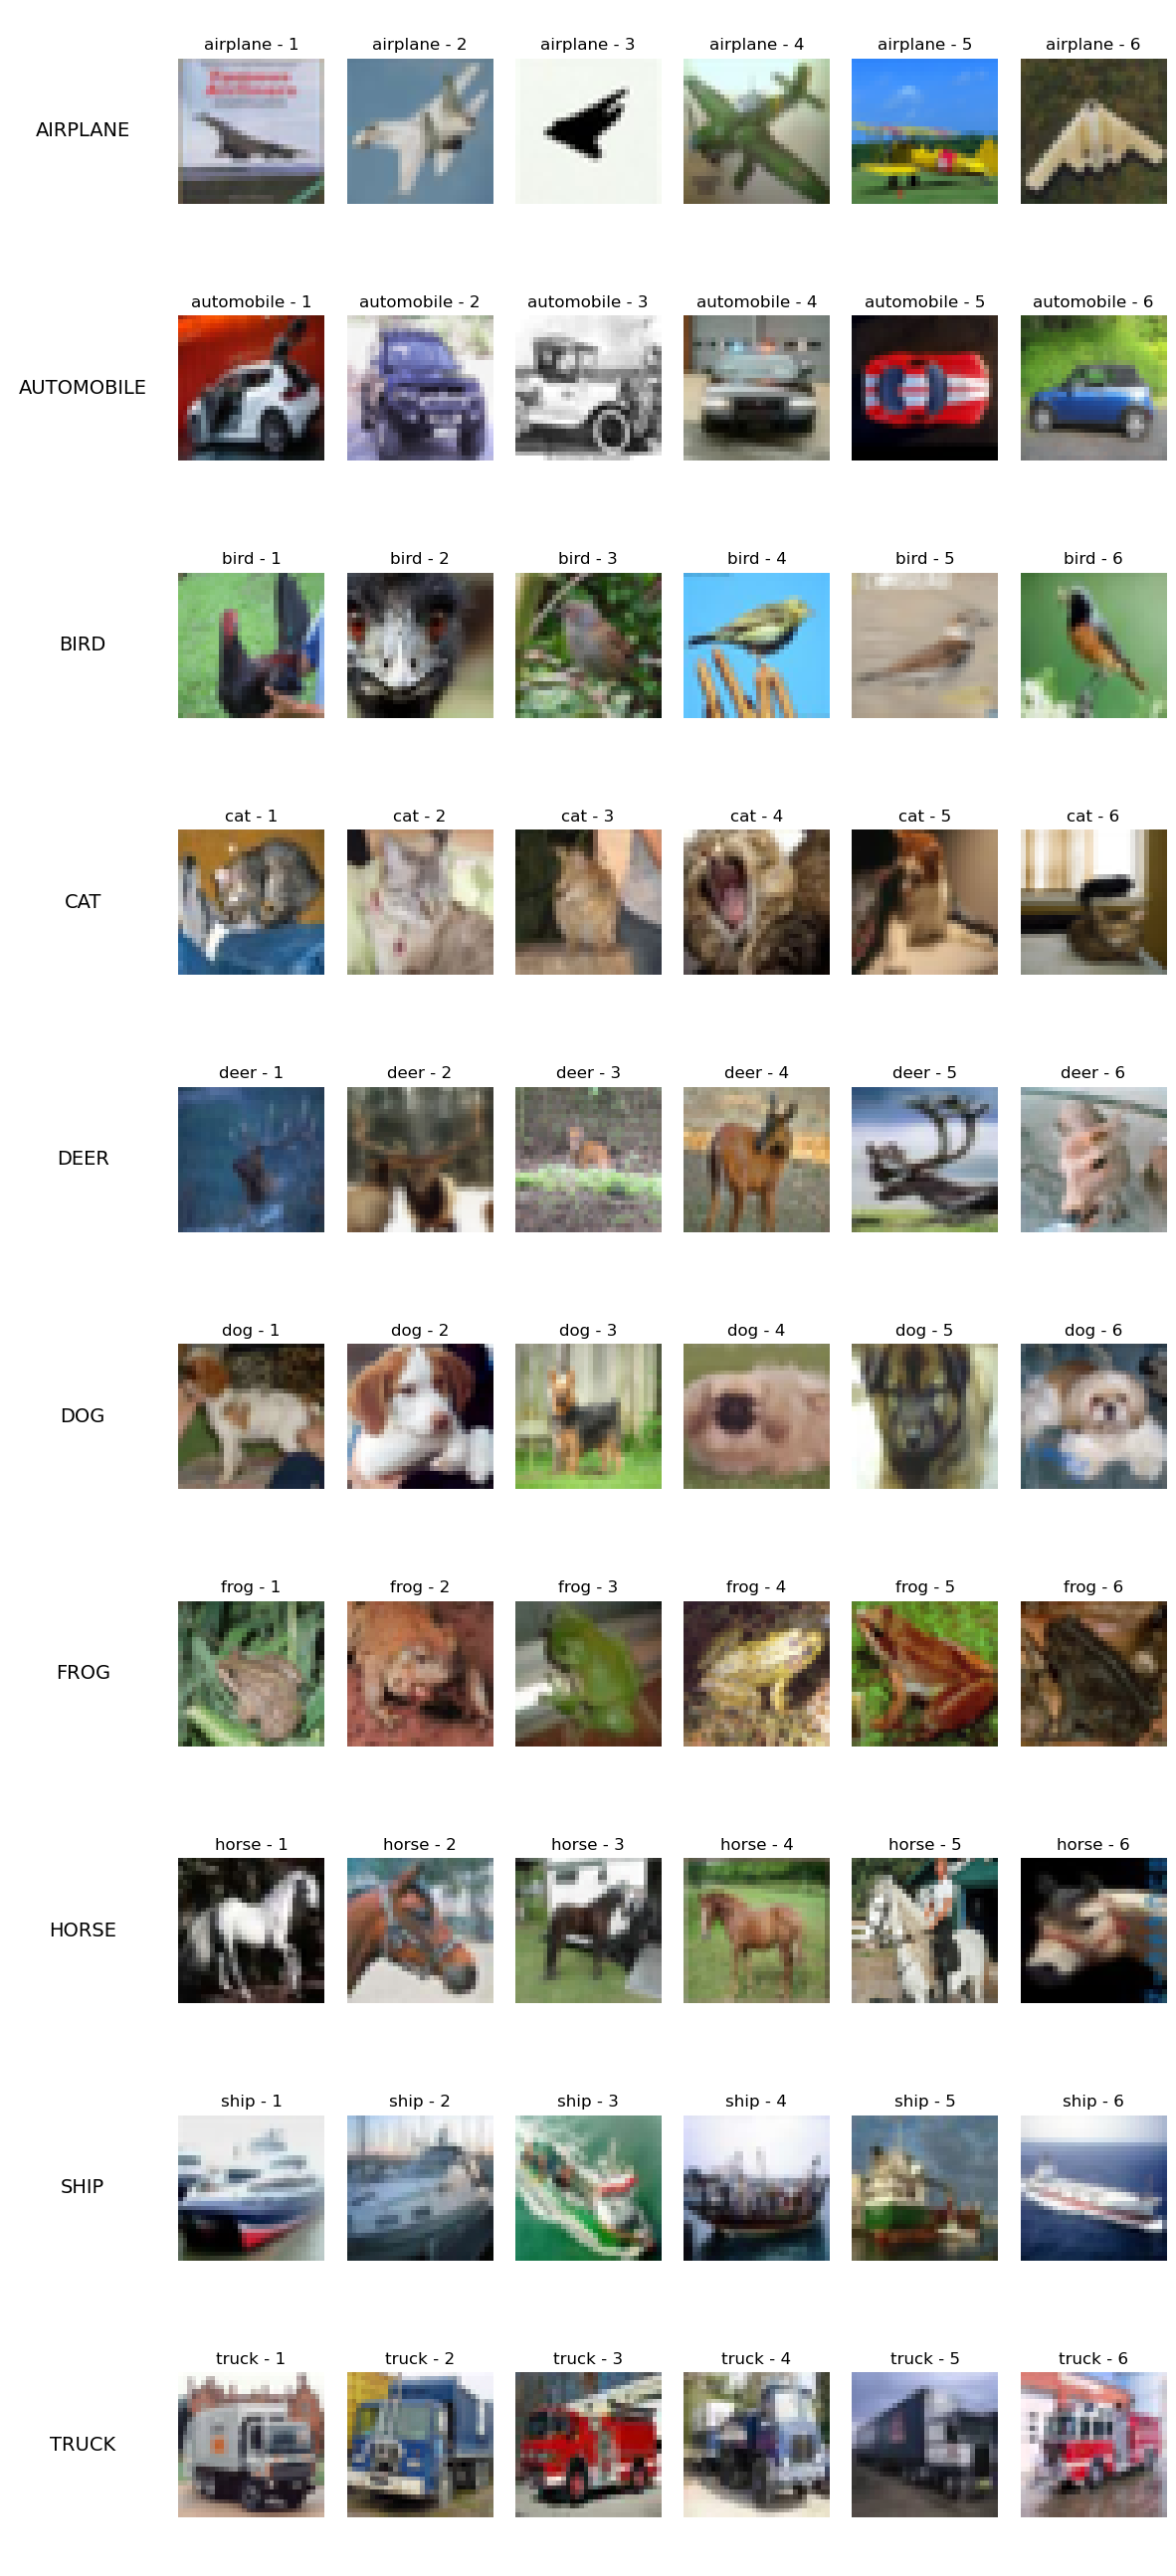

In [3]:
classnames = ['AIRPLANE', 'AUTOMOBILE', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']

plot.figure(figsize=(12, 26))

for class_index in range(10):
    indices = n.where(output_testing == class_index)[0][:6]  
    images, names = input_Testing[indices], output_testing[indices]

    plot.subplot(10, 7, class_index * 7 + 1)
    plot.text(0.5, 0.5, classnames[class_index].upper(), fontsize=14, ha='center', va='center')
    plot.axis('off')

    for t in range(6):
        plot.subplot(10, 7, class_index * 7 + 2 + t)
        plot.imshow(images[t])
        plot.title(classnames[names[t][0]].lower() +" - "+ str(t+1))
        plot.axis('off')

plot.tight_layout()
plot.show()

In [4]:
input_Training = input_Training.reshape(input_Training.shape[0], -1)
input_Testing = input_Testing.reshape(input_Testing.shape[0], -1)

input_Training = input_Training.astype('float') / 255
input_Testing = input_Testing.astype('float') / 255

y_norm = n.eye(len(classnames))[output_training.flatten()]
y_test_onehot = n.eye(len(classnames))[output_testing.flatten()]


In [5]:
class LinearClassifier:
    def __init__(self, inp, out):
        self.W = n.random.randn(inp, out) * 0.001
        self.b = n.zeros(out)
        self.train_loss,self.test_acc = [],[]
        self.train_acc = []
    
    def forward_backward(self, inp, out, rate):
        # Forward pass
        pred_vals = n.dot(inp, self.W) + self.b
        m = inp.shape[0]
        W,B = n.dot(inp.T, (pred_vals - out)) / m , n.sum((pred_vals - out), axis=0) / m
        W,B = n.clip(W, -1.0, 1.0), n.clip(B, -1.0, 1.0)
        self.W -= rate * W
        self.b -= rate * B
        
        return pred_vals

    def FIT(self, input_Training, output_training, input_Testing, output_testing, epochs, rate, size):
        for e in range(epochs):
            for i in range(0, len(input_Training), size):
                l=input_Training[i:i+size]
                k= output_training[i:i+size]
                x,y = l,k
                pred_vals = self.forward_backward(x, y, rate)
                loss = n.mean(n.square(pred_vals - y))
            if e % 10 == 0:
                print(f'Epoch {e}, Loss: {loss:.4f}')                
            out_train_pred = self.forward_backward(input_Training, output_training, rate)
            train_acc = accuracy(output_training, out_train_pred)
            self.train_acc.append(train_acc)
            out_test_pred = self.forward_backward(input_Testing, output_testing, rate)
            test_acc = accuracy(output_testing, out_test_pred)
            self.test_acc.append(test_acc)
            self.train_loss.append(loss)

def accuracy(true_vals, pred_vals):
    return n.mean(n.argmax(true_vals, axis=1) == n.argmax(pred_vals, axis=1))


In [6]:
inp = input_Training.shape[1]
out = len(classnames)
epochs = 100
rates = [0.1,0.01,0.001]
batches = [32,64,128]

input_Training, x_val, y_norm, y_val_norm = train_test_split(input_Training, y_norm, test_size=0.1, random_state=42)

best_accuracy = 0.0
best_classifier = None

for i in rates:
    for j in batches:
        classifier = LinearClassifier(inp, out)
        classifier.FIT(input_Training, y_norm, x_val, y_val_norm, epochs, i, j)
        test_accuracy = classifier.test_acc[-1] * 100
        print(f"Learning Rate: {i}, Batch Size: {j}, Testing Accuracy: {test_accuracy:.2f}%")
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_classifier = classifier

Epoch 0, Loss: 14898.9571
Epoch 10, Loss: 14897.3089
Epoch 20, Loss: 14895.8607
Epoch 30, Loss: 14894.5659
Epoch 40, Loss: 14893.3965
Epoch 50, Loss: 14892.3247
Epoch 60, Loss: 14891.3423
Epoch 70, Loss: 14890.4419
Epoch 80, Loss: 14889.6165
Epoch 90, Loss: 14888.8598
Learning Rate: 0.1, Batch Size: 32, Testing Accuracy: 9.70%
Epoch 0, Loss: 61.7315
Epoch 10, Loss: 61.8005
Epoch 20, Loss: 61.8313
Epoch 30, Loss: 61.8503
Epoch 40, Loss: 61.8640
Epoch 50, Loss: 61.8752
Epoch 60, Loss: 61.8856
Epoch 70, Loss: 61.8954
Epoch 80, Loss: 61.9045
Epoch 90, Loss: 61.9129
Learning Rate: 0.1, Batch Size: 64, Testing Accuracy: 13.16%
Epoch 0, Loss: 61.0702
Epoch 10, Loss: 61.1046
Epoch 20, Loss: 61.1107
Epoch 30, Loss: 61.1134
Epoch 40, Loss: 61.1151
Epoch 50, Loss: 61.1164
Epoch 60, Loss: 61.1175
Epoch 70, Loss: 61.1185
Epoch 80, Loss: 61.1193
Epoch 90, Loss: 61.1200
Learning Rate: 0.1, Batch Size: 128, Testing Accuracy: 10.18%
Epoch 0, Loss: 57.1567
Epoch 10, Loss: 55.8385
Epoch 20, Loss: 55.5222

In [7]:
best_accuracy

39.660000000000004

In [8]:
epochs_range = range(0, epochs, 1) 

Text(0.5, 1.0, 'Training Loss over Epochs')

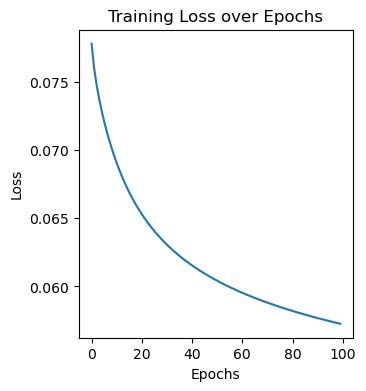

In [9]:
plot.figure(figsize=(12, 4))

plot.subplot(1, 3, 1)
plot.plot(epochs_range, best_classifier.train_loss[:epochs], label='Training Loss')  # Only plot for recorded epochs
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.title('Training Loss over Epochs')

Text(0.5, 1.0, 'Testing Accuracy over Epochs')

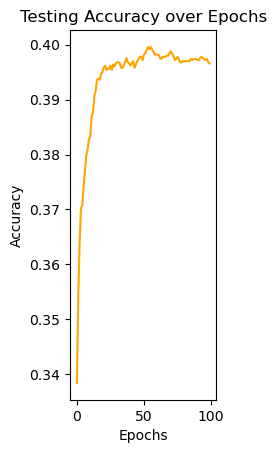

In [10]:
plot.subplot(1, 3, 2)
plot.plot(epochs_range, best_classifier.test_acc[:epochs], label='Testing Accuracy', color='orange')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Testing Accuracy over Epochs')

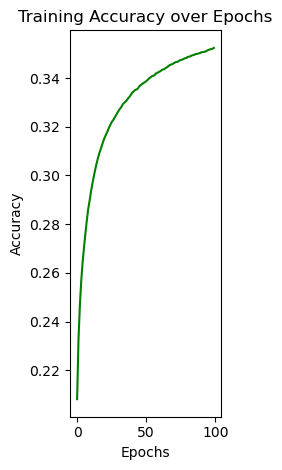

In [11]:
plot.subplot(1, 3, 3)
plot.plot(epochs_range, best_classifier.train_acc[:epochs], label='Training Accuracy', color='green')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Training Accuracy over Epochs')

plot.tight_layout()
plot.show()

In [12]:
class LinearClassifierReg:
    def __init__(self, inp, out, reg):
        self.W = n.random.randn(inp, out) * 0.001
        self.B = n.zeros(out)
        self.reg = reg
        self.train_loss_history_2,self.test_acc_history_2 = [],[]
        self.train_acc_history_2 = []
    
    def forward_backward(self, x_2, y_2, rate):
        # Forward pass
        out_pred = n.dot(x_2, self.W) + self.B
        m_2 = x_2.shape[0]
        a = n.dot(x_2.T, (out_pred - y_2))
        b = m_2 + 2 * self.reg * self.W
        W = a/b 
        a= n.sum((out_pred - y_2), axis=0) 
        B = a / m_2
        W = n.clip(W, -1.0, 1.0)
        B = n.clip(B, -1.0, 1.0)
        self.W -= rate * W
        self.B -= rate * B
        return out_pred
    
    def FIT(self, inp_train, out_train, inp_test, out_test, epoc, rate, batch):
        for epoch in range(epoc):
            for a in range(0, len(inp_train), batch):
                x = inp_train[a:a+batch]
                y = out_train[a:a+batch]
                out_pred = self.forward_backward(x, y, rate)
                loss_2 = n.mean(n.square(out_pred - y)) + self.reg * n.sum(n.square(self.W))
                
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss_2:.4f}')     
            out_pred = self.forward_backward(inp_train, out_train, rate)
            train_acc_2 = accuracy(out_train, out_pred)
            self.train_acc_history_2.append(train_acc_2)
            out_test_pred = self.forward_backward(inp_test, out_test, rate)
            test_acc_2 = accuracy(out_test, out_test_pred)
            self.test_acc_history_2.append(test_acc_2)
            self.train_loss_history_2.append(loss_2)
def accuracy(y_true_2, out_pred):
    return n.mean(n.argmax(y_true_2, axis=1) == n.argmax(out_pred, axis=1))


In [15]:

inp = input_Training.shape[1]
out = len(classnames)
epoc = 100
learning_rates_2 = [0.1,0.01,0.001]
batch_sizes_2 = [32,64,128]
reg = 0.01  # Regularization strength

inp_train, inp_val, y_train_norm, y_val_norm = train_test_split(input_Training, y_norm, test_size=0.1, random_state=42)

best_accuracy_2 = 0.0
best_classifier_2 = None

In [16]:
for a in learning_rates_2:
    for b in batch_sizes_2:
        classifier_2 = LinearClassifierReg(inp, out, reg)
        classifier_2.FIT(inp_train, y_train_norm, inp_val, y_val_norm, epoc, a, b)
        final_test_accuracy_2 = classifier_2.test_acc_history_2[-1] * 100
        print(f"Learning Rate: {a}, Batch Size: {b}, Final Testing Accuracy: {final_test_accuracy_2:.2f}%")

        if final_test_accuracy_2 > best_accuracy_2:
            best_accuracy_2 = final_test_accuracy_2
            best_classifier_2 = classifier_2

Epoch 0, Loss: 1225.5759
Epoch 10, Loss: 1225.5759
Epoch 20, Loss: 1225.5759
Epoch 30, Loss: 1225.5759
Epoch 40, Loss: 1225.5759
Epoch 50, Loss: 1225.5759
Epoch 60, Loss: 1225.5759
Epoch 70, Loss: 1225.5759
Epoch 80, Loss: 1225.5759
Epoch 90, Loss: 1225.5759
Learning Rate: 0.1, Batch Size: 32, Final Testing Accuracy: 10.20%
Epoch 0, Loss: 22166.5727
Epoch 10, Loss: 22153.9013
Epoch 20, Loss: 22151.9246
Epoch 30, Loss: 22150.8504
Epoch 40, Loss: 22150.1614
Epoch 50, Loss: 22149.6817
Epoch 60, Loss: 22149.3337
Epoch 70, Loss: 22149.0629
Epoch 80, Loss: 22148.8331
Epoch 90, Loss: 22148.6369
Learning Rate: 0.1, Batch Size: 64, Final Testing Accuracy: 10.04%
Epoch 0, Loss: 22427.7486
Epoch 10, Loss: 22427.7486
Epoch 20, Loss: 22427.7486
Epoch 30, Loss: 22427.7486
Epoch 40, Loss: 22427.7486
Epoch 50, Loss: 22427.7486
Epoch 60, Loss: 22427.7486
Epoch 70, Loss: 22427.7486
Epoch 80, Loss: 22427.7486
Epoch 90, Loss: 22427.7486
Learning Rate: 0.1, Batch Size: 128, Final Testing Accuracy: 10.36%
E

In [17]:
best_accuracy_2

40.55555555555556

In [18]:

epochs_range_2 = range(0, epoc, 1)  # Adjust the range to match the number of epochs


Text(0.5, 1.0, 'Training Loss over Epochs')

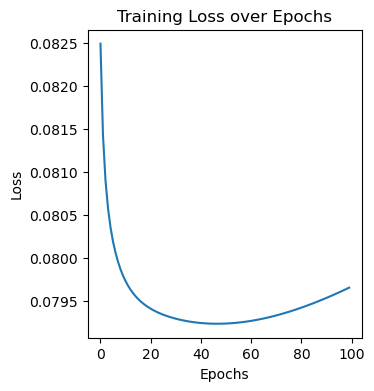

In [19]:
plot.figure(figsize=(12, 4))

plot.subplot(1, 3, 1)
plot.plot(epochs_range_2, best_classifier_2.train_loss_history_2[:epoc], label='Training Loss')  # Only plot for recorded epochs
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.title('Training Loss over Epochs')


Text(0.5, 1.0, 'Testing Accuracy over Epochs')

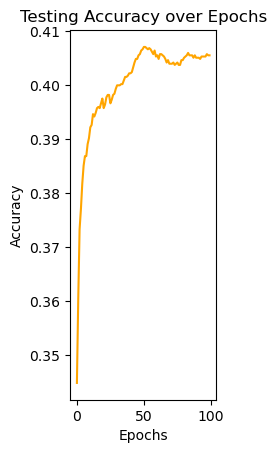

In [20]:
plot.subplot(1, 3, 2)
plot.plot(epochs_range_2, best_classifier_2.test_acc_history_2[:epoc], label='Testing Accuracy', color='orange')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Testing Accuracy over Epochs')

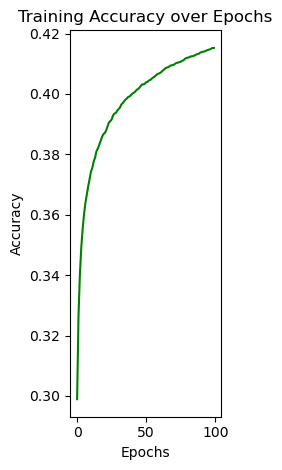

In [21]:
plot.subplot(1, 3, 3)
plot.plot(epochs_range_2, best_classifier_2.train_acc_history_2[:epoc], label='Training Accuracy', color='green')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Training Accuracy over Epochs')

plot.tight_layout()
plot.show()

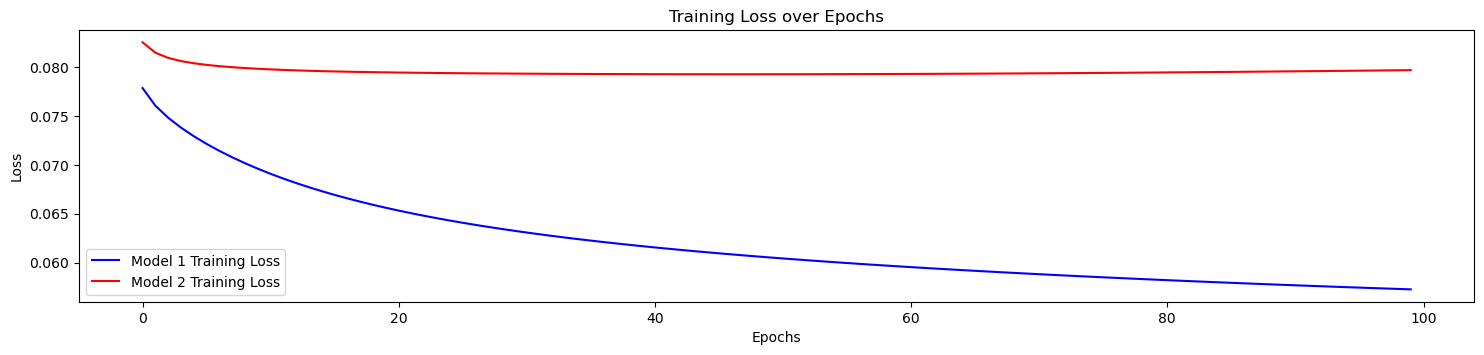

In [22]:
plot.figure(figsize=(18, 12))
plot.subplot(3, 1, 1)
plot.plot(epochs_range, best_classifier.train_loss[:epochs], label='Model 1 Training Loss', color='blue')
plot.plot(epochs_range_2, best_classifier_2.train_loss_history_2[:epoc], label='Model 2 Training Loss', color='red')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.title('Training Loss over Epochs')
plot.legend()

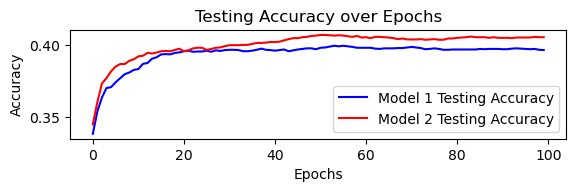

In [23]:
plot.subplot(3, 1, 2)
plot.plot(epochs_range, best_classifier.test_acc[:epochs], label='Model 1 Testing Accuracy', color='blue')
plot.plot(epochs_range_2, best_classifier_2.test_acc_history_2[:epoc], label='Model 2 Testing Accuracy', color='red')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Testing Accuracy over Epochs')
plot.legend()


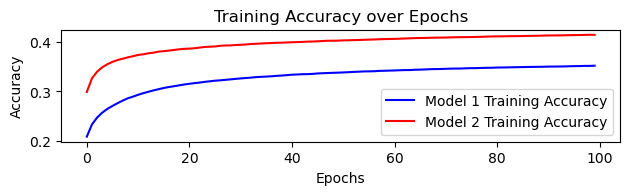

In [24]:
plot.subplot(3, 1, 3)
plot.plot(epochs_range, best_classifier.train_acc[:epochs], label='Model 1 Training Accuracy', color='blue')
plot.plot(epochs_range_2, best_classifier_2.train_acc_history_2[:epoc], label='Model 2 Training Accuracy', color='red')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Training Accuracy over Epochs')
plot.legend()

plot.tight_layout()
plot.show()

In [ ]:
Model Initialization (models.Sequential()):
    models.Sequential() initializes a linear stack of layers. It's a way to build a Keras model by stacking layers sequentially.
    Inside Sequential(), various layers are added one by one to construct the model architecture.

Convolutional Layers (layers.Conv2D()):
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)): This adds a 2D convolutional layer with 32 filters, each of size 3x3, using the ReLU activation function. It expects input images of size 32x32 pixels with 3 channels (RGB).
    layers.Conv2D(64, (3, 3), activation='relu'): Adds another convolutional layer with 64 filters and a ReLU activation.
    layers.Conv2D(128, (3, 3), activation='relu'): Adds a third convolutional layer with 128 filters and a ReLU activation.

Batch Normalization (layers.BatchNormalization()):
    layers.BatchNormalization(): Adds a batch normalization layer after certain convolutional layers. Batch normalization normalizes the activations of the previous layer at each batch, helping the optimization process and reducing overfitting.

Max Pooling (layers.MaxPooling2D()):
    layers.MaxPooling2D((2, 2), padding='same'): Adds a 2D max pooling layer with a pool size of 2x2 and 'same' padding. Max pooling reduces the spatial dimensions of the input volume, which helps in reducing computational complexity and controlling overfitting.
Dropout (layers.Dropout()):
    layers.Dropout(0.25): Adds a dropout layer with a dropout rate of 25%. Dropout randomly sets a fraction of input units to zero during training, which helps prevent overfitting by forcing the network to learn redundant representations.
Flatten Layer (layers.Flatten()):

layers.Flatten(): Adds a layer to flatten the 3D output of the convolutional layers into a 1D vector. This prepares the data for input into the fully connected layers.

Fully Connected Layers (layers.Dense()):

layers.Dense(hs, activation='relu', kernel_regularizer=regularizers.l2(rs)): Adds a fully connected (dense) layer with 'hs' units (hidden size) and ReLU activation. It also applies L2 regularization with regularization strength 'rs' to the kernel weights.
layers.Dense(10, activation='softmax'): Adds the output layer with 10 units (for 10 classes in CIFAR-10) and softmax activation. Softmax activation outputs probabilities for each class, ensuring they sum up to 1.

Model Compilation (model.compile()):

    model.compile(): Configures the model for training.
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr): Specifies the Adam optimizer with a given learning rate 'lr'.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(): Defines the loss function as Sparse Categorical Crossentropy, suitable for multi-class classification tasks.
    metrics=['accuracy']: Specifies that accuracy should be monitored during training.
Model Training (model.fit()):
    model.fit(): Trains the model on the training data.
    input_Training and output_training: Training data and corresponding labels.
    epochs=10: Number of epochs (iterations over the entire training data).
    batch_size=100: Number of samples per gradient update.
    validation_data=(input_Testing, output_testing): Validation data to evaluate the model after each epoch.
    verbose=1: Displays training progress (progress bar with one line per epoch).